In [217]:
import numpy as np
import pandas as pd
# Attribute Information:
#    1. sepal length in cm
#    2. sepal width in cm
#    3. petal length in cm
#    4. petal width in cm
#    5. class: 
#       -- Iris Setosa
#       -- Iris Versicolour
#       -- Iris Virginica

In [218]:
class Perceptron(object):
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    def fit(self,X,Y):
        rgen=np.random.RandomState(self.random_state)   # creates the object of the RandomState Class of pseudo-random number generator.
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1]) # loc->mean of distribution, scale-> Std dev , 
        self.errors_=[]
        for _ in range(self.n_iter):
            errors=0
            for xi,target in zip(X,Y):
                update=self.eta*(target-self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                errors+=int(update!=0.0)  #checks how many times the output wasn't 0.0
            self.errors_.append(errors)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,-1)


In [219]:
ds=pd.read_csv('iris-dataset.csv',names=['sep_l','sep_w','pet_l','sep_w','class'])
# ds.head(51)

In [225]:
#TEST---------------->>>>>>>>>>>

y=ds.iloc[0:100,4].values  # .values converts dataframe to numpy_array
# print(y)
y = np.where(y == 'Iris-setosa', -1, 1)
print(y)
X = ds.iloc[0:100, [0, 2]].values
# print(X[0])
X.shape # give tuple of size of array
X.shape[0] # gives the 1st element of the tuple

w=a.normal(loc=0.0,scale=0.01,size=3)
print(X[0],w[:])
a1=np.dot(X[0],w[1:])+w[0]
print(a1)
a2=np.where(a1>=0,1,-1)
print(a2)
print(0.2*X[0])
w[1:]+=0.2*X[0]
print(w)
print(int(0.64))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]
[5.1 1.4] [ 0.01744812 -0.00761207  0.00319039]
-0.016906886958686064
-1
[1.02 0.28]
[0.01744812 1.01238793 0.28319039]
0


In [221]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = ds.iloc[0:100, 4].values  # .values converts dataframe to numpy_array

y = np.where(y == 'Iris-setosa', -1, 1)  # if y==setosa then -1 otherwise 1

# extract sepal length and petal length
X = ds.iloc[0:100, [0, 2]].values  # ds.iloc[0:100,[0,2]]=> 0:100 is rows from (0,99) and [0,2] is to select col 0 and 2

# plot data
# plt.scatter(X[:50, 0], X[:50, 1],
#             color='red', marker='o', label='setosa')
# plt.scatter(X[50:100, 0], X[50:100, 1],
#             color='blue', marker='x', label='versicolor')

# plt.xlabel('sepal length [cm]')
# plt.ylabel('petal length [cm]')
# plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
# plt.show()

10


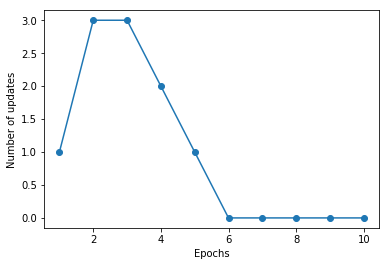

In [226]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)
print(len(ppn.errors_))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [223]:
#TEST------------->>>>

a=(np.random.RandomState(1))
w=a.normal(loc=0.0,scale=0.01,size=3)
w

array([ 0.01624345, -0.00611756, -0.00528172])